## EDA - Dataset 03 - data_science_salaries_2023

### 1. Packages & Settings


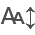

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Advanced analysis
from scipy import stats
from ydata_profiling import ProfileReport

# Interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Configuration
pd.set_option('display.max_columns', 30)
sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format = 'retina'
np.random.seed(42)  # Reproducibility

### 2. Importing Data

In [2]:
# Data Loading
filepath = os.path.abspath(os.path.join(globals()['_dh'][0], '..', '..', '0_Data/03_data_science_salaries_2023/0_Raw/ds_salaries.csv'))
df = pd.read_csv(f"{filepath}")

### 3.1 First Look

In [3]:
# Sample data
show(df.sample(5))  # Random rows to avoid bias

# Summary of the DataFrame
df.info()

# Basic Statistics of the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

### 3.2 Results of First Look:
##### Observations:
- small sized dataframe (3755 x 11)
- There are no missing values, which is good. No cleaning of null/faulty values necessary.
- Data types look good, no correction of data types necessary.
##### Potential Problems:
- *N/A*

### 4.1 Automated Analysis with ydata_profiling

In [ ]:
# profile = ProfileReport(df, title="Automated EDA", explorative=True)
# profile.to_notebook_iframe()
# Save to HTML for later review (optional)
# profile.to_file("1b_automated_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 399.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Automated EDA Results
##### Observations
- 500 Duplicate rows, likely not a problem, since jobs can have same characteristics. **(check)**
- correlations between salaries and currency/calculated in USD is not very relevant.
- No clear correlations shown for jobs, **transform** to make more clear.

##### Hypotheses:
- Correlations possible between job titles/salary, location/salary. Investigate with transformations

### 5. Necessary Cleaning & Transformation Steps for Python Scripts
##### Cleaning:
- Observe duplicate rows, check if problematic. If yes, clean.
##### Transformation:
- Filter by job titles and observe interquartile range (IQR).
- Filter by location and observe interquartile range (IQR).
- Filter by experience level and observe interquartile range (IQR).

### 6. Hypothesis-Driven Analysis

In [5]:
# Check hypotheses in 4.2

### 7. Focused Investigation
*When to use*:  
- Drill into subgroups (e.g., "Why do users aged 30-40 have higher churn?")  
- Export specific slices for stakeholder reviews  
*Industry Standard*: Never explore blindly – start with hypotheses from Sections 4-5.

In [6]:
# Check how hyptheses from 3-5 can be explained by the data
"""
show(
    df.query("Income > 70000"),
    column_filters="footer",
    buttons=["copy", "csv"],
    scrollY="300px",
    classes="compact"
)
"""

'\nshow(\n    df.query("Income > 70000"),\n    column_filters="footer",\n    buttons=["copy", "csv"],\n    scrollY="300px",\n    classes="compact"\n)\n'